In [51]:
import pandas as pd

In [66]:
#Load the Excel file
file_path= "TRAFFIC ACCIDENTS DATA.xlsx"
data = pd.read_excel(file_path)
# Display the first few rows to verify loading
data.head(6)



,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents,Weather conditions
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,Passengers,4,4.30 pm,NaN
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,Passengers,1,5.50 pm,NaN
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,Drivers/Occupants,4,NaN,NaN
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,Driver and passengers,3,6.00 pm,NaN
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,Pedestrian,1,NaN,NaN
5,2022-08-06,Mlima Swara,Mlima Swara,Murang'a,Kenol-Sagana Road,Car hit a stationary lorry,Passengers,5,NaN,NaN


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          80 non-null     datetime64[ns]
 1   Accident Spot                 81 non-null     object        
 2   Area                          81 non-null     object        
 3   County                        81 non-null     object        
 4   Road/ Highway                 80 non-null     object        
 5   Brief Accident Details/Cause  79 non-null     object        
 6   Victims                       63 non-null     object        
 7   Total people confirmed dead   72 non-null     object        
 8   Time of the Accidents         25 non-null     object        
 9   Weather conditions            1 non-null      object        
dtypes: datetime64[ns](1), object(9)
memory usage: 6.5+ KB


<span style="color: yellow; font-size: 24px;">Cleaning</span>

In [68]:
data.isnull().sum()

Date                             1
Accident Spot                    0
Area                             0
County                           0
Road/ Highway                    1
Brief Accident Details/Cause     2
Victims                         18
Total people confirmed dead      9
Time of the Accidents           56
Weather conditions              80
dtype: int64

In [69]:
# drop rows where date or road/highway have null values
data = data.dropna(subset=['Date', 'Road/ Highway'])
data.isnull().sum()


Date                             0
Accident Spot                    0
Area                             0
County                           0
Road/ Highway                    0
Brief Accident Details/Cause     2
Victims                         17
Total people confirmed dead      9
Time of the Accidents           56
Weather conditions              78
dtype: int64

In [70]:
# Filling missing values in the 'Brief Accident Details/Cause' column with 'Unknown'
data['Brief Accident Details/Cause'].fillna('Unknown', inplace=True)

# Filling missing values in the 'Victims' column with 'Unknown'
data['Victims'].fillna('Unknown', inplace=True)


C:\Users\night\AppData\Local\Temp\ipykernel_12864\168924284.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Brief Accident Details/Cause'].fillna('Unknown', inplace=True)
C:\Users\night\AppData\Local\Temp\ipykernel_12864\168924284.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [71]:
# Filling missing values in 'Total people confirmed dead' column with 0
data['Total people confirmed dead'].fillna(0, inplace=True)
data.isnull().sum()


C:\Users\night\AppData\Local\Temp\ipykernel_12864\163222063.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Total people confirmed dead'].fillna(0, inplace=True)


Date                             0
Accident Spot                    0
Area                             0
County                           0
Road/ Highway                    0
Brief Accident Details/Cause     0
Victims                          0
Total people confirmed dead      0
Time of the Accidents           56
Weather conditions              78
dtype: int64

In [72]:
data.drop(columns=['Weather conditions', ], inplace=True)
# Display the columns in the dataset
#print(data.columns)
print(data.columns)




Index(['Date', 'Accident Spot', 'Area', 'County', 'Road/ Highway',
       'Brief Accident Details/Cause', 'Victims',
       'Total people confirmed dead', 'Time of the Accidents'],
      dtype='object')


In [73]:
data.isnull().sum()

Date                             0
Accident Spot                    0
Area                             0
County                           0
Road/ Highway                    0
Brief Accident Details/Cause     0
Victims                          0
Total people confirmed dead      0
Time of the Accidents           56
dtype: int64

In [74]:
# Ensure the column is string type
data['Time of the Accidents'] = data['Time of the Accidents'].astype(str)

# Replace '.' with ':' in time format
data['Time of the Accidents'] = data['Time of the Accidents'].str.replace(
    r'(\d{1,2})\.(\d{2}) ([ap]m)', r'\1:\2 \3', regex=True
)

# Convert to datetime using the appropriate format
data['Time of the Accidents'] = pd.to_datetime(
    data['Time of the Accidents'], format='%I:%M %p', errors='coerce'
)

# Format time as HH:MM (24-hour format)
data['Time of the Accidents'] = data['Time of the Accidents'].dt.strftime('%H:%M')

# Check unique values
print(data['Time of the Accidents'].unique())


['16:30' '17:50' nan '18:00' '12:30' '02:00' '16:20' '18:30' '21:00'
 '22:00' '23:30' '13:00' '19:30' '07:30' '23:00' '04:30']


In [75]:
# Function to fill missing time values based on the most frequent time for each cause
def fill_time_by_cause(x):
    # Get the mode (most frequent value) of the series
    mode_value = x.mode()
    
    # If mode is not empty, fill missing values with the mode
    if not mode_value.empty:
        return x.fillna(mode_value[0])
    else:
        # If mode is empty, return the original series
        return x

# Apply the function to fill missing values in 'Time of the Accidents'
# Group data by 'Brief Accident Details/Cause' and transform 'Time of the Accidents' column
data['Time of the Accidents'] = data.groupby('Brief Accident Details/Cause')['Time of the Accidents'].transform(fill_time_by_cause)

# Check the number of remaining missing values in the 'Time of the Accidents' column
missing_values_count = data['Time of the Accidents'].isna().sum()

# Output the count of missing values
print(f"Number of remaining missing values: {missing_values_count}")


Number of remaining missing values: 51


In [76]:
# Function to fill missing time values based on the most frequent time for each 'Area'
def fill_time_by_area(x):
    # Calculate the mode (most frequent value) of the series
    mode_value = x.mode()

    # If the mode is not empty, fill missing values with the mode
    if not mode_value.empty:
        return x.fillna(mode_value[0])
    else:
        # If the mode is empty, return the original series
        return x

# Apply the function to fill missing values in 'Time of the Accidents'
# Group data by 'Area' and transform 'Time of the Accidents' column
data['Time of the Accidents'] = data.groupby('Area')['Time of the Accidents'].transform(fill_time_by_area)

# Calculate the number of remaining missing values
missing_values_count = data['Time of the Accidents'].isna().sum()

# Print the count of remaining missing values
print(f"Number of remaining missing values: {missing_values_count}")


Number of remaining missing values: 40


In [77]:
# Function to fill missing time values based on the most frequent time for each 'Accident Spot'
def fill_time_by_spot(x):
    # Calculate the mode (most frequent value) of the series
    mode_value = x.mode()

    # If the mode is not empty, fill missing values with the mode
    if not mode_value.empty:
        return x.fillna(mode_value[0])
    else:
        # If the mode is empty, return the original series unchanged
        return x

# Apply the function to fill missing values in 'Time of the Accidents'
# Group data by 'Accident Spot' and transform 'Time of the Accidents' column
data['Time of the Accidents'] = data.groupby('Accident Spot')['Time of the Accidents'].transform(fill_time_by_spot)

# Calculate the number of remaining missing values
missing_values_count = data['Time of the Accidents'].isna().sum()

# Print the count of remaining missing values
print(f"Number of remaining missing values: {missing_values_count}")


Number of remaining missing values: 38


In [78]:
# Function to fill missing time values based on the most frequent time for each 'County'
def fill_time_by_county(x):
    # Calculate the mode (most frequent value) of the series
    mode_value = x.mode()

    # If the mode is not empty, fill missing values with the mode
    if not mode_value.empty:
        return x.fillna(mode_value[0])
    else:
        # If the mode is empty, return the original series unchanged
        return x

# Apply the function to fill missing values in 'Time of the Accidents'
# Group data by 'County' and transform 'Time of the Accidents' column
data['Time of the Accidents'] = data.groupby('County')['Time of the Accidents'].transform(fill_time_by_county)

# Calculate the number of remaining missing values
missing_values_count = data['Time of the Accidents'].isna().sum()

# Print the count of remaining missing values
print(f"Number of remaining missing values: {missing_values_count}")


Number of remaining missing values: 21


In [79]:
# Function to convert time string to minutes since midnight
def time_to_minutes(time_str):
    # Check if the input is a string
    if isinstance(time_str, str):
        try:
            # Convert the time string to a datetime object using the specified format
            time_obj = pd.to_datetime(time_str, format='%H:%M', errors='coerce')
            
            # Check if the conversion was successful (i.e., the time_obj is not NaT)
            if pd.notna(time_obj):
                # Calculate the time in minutes since midnight
                return time_obj.hour * 60 + time_obj.minute
        except Exception as e:
            # If any error occurs, return None
            return None
    # Return None if the input is not a string
    return None

# Apply the time_to_minutes function to the 'Time of the Accidents' column
data['Time in Minutes'] = data['Time of the Accidents'].apply(time_to_minutes)

# Calculate the median time in minutes
median_time_minutes = data['Time in Minutes'].median()

# Fill missing values in the 'Time in Minutes' column with the median time
data['Time in Minutes'].fillna(median_time_minutes, inplace=True)

# Convert the 'Time in Minutes' back to a time format and update 'Time of the Accidents'
data['Time of the Accidents'] = pd.to_datetime(data['Time in Minutes'], unit='m', origin='unix').dt.strftime("%H:%M")

# Count the remaining missing values in the 'Time of the Accidents' column
missing_values_count = data['Time of the Accidents'].isna().sum()

# Print the count of remaining missing values
print(f"Number of remaining missing values: {missing_values_count}")


Number of remaining missing values: 0


C:\Users\night\AppData\Local\Temp\ipykernel_12864\2942502584.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Time in Minutes'].fillna(median_time_minutes, inplace=True)


In [80]:
data.head(10)

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents,Time in Minutes
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,Passengers,4,16:30,990.0
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,Passengers,1,17:50,1070.0
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,Drivers/Occupants,4,02:00,120.0
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,Driver and passengers,3,18:00,1080.0
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,Pedestrian,1,21:00,1260.0
5,2022-08-06,Mlima Swara,Mlima Swara,Murang'a,Kenol-Sagana Road,Car hit a stationary lorry,Passengers,5,16:25,985.0
6,2022-07-27,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Driver lost control and swerved off the bridge,Passengers,6,02:00,120.0
7,2022-07-28,Makuyu,Makuyu,Murang'a,Kenol-Sagana Road,Vehicle rammed into a lorry,Passengers,7,16:25,985.0
8,2022-06-28,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the bridge,Passengers,4,02:00,120.0
9,2021-09-21,River Tungu,River Tungu,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the river,Passengers,5,02:00,120.0


<span style="color: yellow; font-size: 24px;">Data Types</span>

In [81]:
data.dtypes

Date                            datetime64[ns]
Accident Spot                           object
Area                                    object
County                                  object
Road/ Highway                           object
Brief Accident Details/Cause            object
Victims                                 object
Total people confirmed dead             object
Time of the Accidents                   object
Time in Minutes                        float64
dtype: object

In [82]:
# Convert 'Total people confirmed dead' column to numeric, coercing errors to NaN
data['Total people confirmed dead'] = pd.to_numeric(data['Total people confirmed dead'], errors='coerce')

# Print the count of missing values (NaN) in the 'Total people confirmed dead' column
print(data[['Total people confirmed dead']].isna().sum())


Total people confirmed dead    1
dtype: int64


In [84]:
# Drop rows where 'Total people confirmed dead' is NaN
data.dropna(subset=['Total people confirmed dead'], inplace=True)

# Print the count of missing values (NaN) across all columns in the dataset
print(data.isna().sum())


Date                            0
Accident Spot                   0
Area                            0
County                          0
Road/ Highway                   0
Brief Accident Details/Cause    0
Victims                         0
Total people confirmed dead     0
Time of the Accidents           0
Time in Minutes                 0
dtype: int64


In [85]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode 'Area' column and create a new encoded column 'area_encoded'
data['area_encoded'] = le.fit_transform(data['Area'])

# Encode 'Accident Spot' column and create a new encoded column 'AccidentSpot_encoded'
data['AccidentSpot_encoded'] = le.fit_transform(data['Accident Spot'])

# Encode 'County' column and create a new encoded column 'County_encoded'
data['County_encoded'] = le.fit_transform(data['County'])

# Display the first few rows of the updated DataFrame
data.head()


,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents,Time in Minutes,area_encoded,AccidentSpot_encoded,County_encoded
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,Passengers,4.0,16:30,990.0,53,51,19
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,Passengers,1.0,17:50,1070.0,36,24,19
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,Drivers/Occupants,4.0,02:00,120.0,42,41,20
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,Driver and passengers,3.0,18:00,1080.0,55,53,20
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,Pedestrian,1.0,21:00,1260.0,34,36,7


<span style="color: yellow; font-size: 24px;">Model</span>

In [86]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split  # Corrected the import (was 'brain_test_split')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

<span style="color: yellow; font-size: 24px;">High risk accident (1)<br></span>
<span style="color: white; font-size: 19px;">Driver and passengers</span><br>
<span style="color: white; font-size: 19px;">Passengers and pedestrians</span><br>
<span style="color: white; font-size: 19px;">Occupants of the small vehicle</span><br>
<span style="color: yellow; font-size: 24px;">Low risk accident (0)</span><br>
<span style="color: white; font-size: 19px;">Pedestrian</span><br>
<span style="color: white; font-size: 19px;">Passenger</span><br>
<span style="color: white; font-size: 19px;">Motorist</span>

In [87]:
# Defining the high risk categories of accident victims
high_risk_categories = [
    "Driver and passengers", "Passengers and pedestrians", "Occupants of the small vehicle", 
    "Drivers/Occupants", "Drivers, Passengers and pedestrians", "Passengers and drivers", 
    "Passenger and driver", "Drivers and passengers", "Driver and other motorists", "Rider", "Motorist"
]

# Mapping 'Victims' to a numeric value based on predefined high-risk categories
data['High Risk Accident'] = data['Victims'].apply(lambda x: 1 if x in high_risk_categories else 0)

# Check the distribution of the binary classification column
print(data['High Risk Accident'].value_counts())


High Risk Accident
0    69
1     9
Name: count, dtype: int64


In [88]:
# Converting 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extracting the day of the week (0: Monday, 1: Tuesday, ..., 6: Sunday)
data['Day_of_Week'] = data['Date'].dt.dayofweek

# Extracting the month from the 'Date' column
data['Month'] = data['Date'].dt.month

# Converting 'Time of the Accidents' to minutes
data['Time_in_Minutes'] = data['Time of the Accidents'].apply(lambda x: int(x.split(":")[0])*60 + int(x.split(":")[1]))


In [89]:
# Dropping columns 'Brief Accident Details/Cause', 'Time_in_Minutes', and 'Road/ Highway' from the dataset
data.drop(['Brief Accident Details/Cause', 'Time_in_Minutes', 'Road/ Highway'], axis=1, inplace=True)

# Display the first few rows of the modified dataset
data.head()


,Date,Accident Spot,Area,County,Victims,Total people confirmed dead,Time of the Accidents,Time in Minutes,area_encoded,AccidentSpot_encoded,County_encoded,High Risk Accident,Day_of_Week,Month
0,2023-08-08,Sobea,Sobea,Nakuru,Passengers,4.0,16:30,990.0,53,51,19,0,1,8
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Passengers,1.0,17:50,1070.0,36,24,19,0,0,8
2,2023-07-25,Ntulele,Ntulele,Narok,Drivers/Occupants,4.0,02:00,120.0,42,41,20,1,1,7
3,2022-12-02,Suswa,Suswa,Narok,Driver and passengers,3.0,18:00,1080.0,55,53,20,1,4,12
4,2022-12-01,Mutira,Mutira,Kirinyaga,Pedestrian,1.0,21:00,1260.0,34,36,7,0,3,12


In [91]:
import json
import pandas as pd

# List of columns with encoded values
columns_to_map = {
    "Accident Spot": "AccidentSpot_encoded",
    "County": "County_encoded",
    "Area": "area_encoded"
}

# Dictionary to store the mappings
encoded_mappings = {}

# Extracting the encoded mappings
for col, encoded_col in columns_to_map.items():
    if col in data.columns and encoded_col in data.columns:  # Check if both columns exist in the dataset
        # Creating the mapping
        mapping = dict(zip(data[col], data[encoded_col]))
        encoded_mappings[col] = mapping

        # Printing the mapping
        print(f"Mapping for {col}:")
        for key, value in mapping.items():
            print(f"{key}: {value}")
        print("\n")
    else:
        # If the columns are missing from the dataset
        print(f"Warning: {col} or {encoded_col} not found in the dataset.\n")

# Grouping by 'County' to get unique values for 'Accident Spot' and 'Area'
county_accident_spot_mapping = data.groupby('County')['Accident Spot'].unique().apply(list).to_dict()
county_area_mapping = data.groupby('County')['Area'].unique().apply(list).to_dict()

# Combining the mappings into a dictionary
combined_mapping = {
    'encoded_mappings': encoded_mappings,
    'county_accident_spot_mapping': county_accident_spot_mapping,
    'county_area_mapping': county_area_mapping
}

# Writing the combined mappings to a JSON file
with open("combined_mappings.json", 'w') as file:
    json.dump(combined_mapping, file, indent=4)

# Printing the final combined mappings
print("Final Combined Mappings:")
print(json.dumps(combined_mapping, indent=4))


Mapping for Accident Spot:
Sobea: 51
Maai-Mahiu: 24
Ntulele: 41
Suswa: 53
Mutira: 36
Mlima Swara: 34
Nithi: 40
Makuyu: 25
River Tungu: 48
Pangani: 45
Naivasha: 38
River Maara: 47
Mlima Kiu: 33
Voi: 56
Londiani: 22
Sachangwan: 50
Jubat: 10
Sotik: 52
Koru: 20
Ojolla: 43
Greensteads: 6
Ngata Bridge: 39
Ratili: 46
Isinya: 8
Taru: 54
Mlolongo: 35
Pala Junction: 44
Kaburengu Junction: 11
Migaa: 30
Laisamis: 21
Ainabkoi Intersection: 0
Ojola: 42
Zion Area: 57
Migori Town: 31
Eka Tano: 4
Josa: 9
Gitaru: 5
Malili: 26
Nairagie-Enkare: 37
Mau Summit: 29
Kirinyaga: 19
Kambiti: 13
Roka: 49
Tuthamba: 55
Amabuko: 1
Kayole Bridge: 16
Burguret Shopping centre: 2
Maragua: 28
Migori town: 32
Kakwamunyen: 12
Mamboleo: 27
Kikopey: 17
IIbisil Towm: 7
Coptic Round: 3
Kanyonyoo Market: 14
Kanyonyoo juction: 15
Losengeli: 23
Kinugi: 18


Mapping for County:
Nakuru: 19
Narok: 20
Kirinyaga: 7
Murang'a: 14
Tharaka Nithi: 22
Nairobi : 17
Naivasha: 18
Makueni: 12
Bomet: 0
Kisumu: 9
Kajiado: 3
Kwale: 11
Nairobi: 16


In [92]:
# Group by County and list associated Accident Spot and Area
county_accident_spot_mapping = data.groupby('County')['Accident Spot'].unique().to_dict()
county_area_mapping = data.groupby('County')['Area'].unique().to_dict()

# Display the mappings
print("County to Accident Spot Mapping:")
print(county_accident_spot_mapping)

print("\nCounty to Area Mapping:")
print(county_area_mapping)


County to Accident Spot Mapping:
{'Bomet': array(['Sachangwan', 'Sotik'], dtype=object), 'Homabay': array(['Pala Junction'], dtype=object), 'Isiolo': array(['Laisamis'], dtype=object), 'Kajiado': array(['Isinya', 'IIbisil Towm'], dtype=object), 'Kakamega': array(['Kaburengu Junction'], dtype=object), 'Kiambu': array(['Eka Tano', 'Gitaru'], dtype=object), 'Kilifi': array(['Roka'], dtype=object), 'Kirinyaga': array(['Mutira', 'Kirinyaga', 'Tuthamba'], dtype=object), 'Kisii': array(['Amabuko'], dtype=object), 'Kisumu': array(['Koru', 'Ojolla', 'Ojola', 'Mamboleo', 'Coptic Round'],
      dtype=object), 'Kitui': array(['Kanyonyoo Market', 'Kanyonyoo juction'], dtype=object), 'Kwale': array(['Taru'], dtype=object), 'Makueni': array(['Mlima Kiu', 'Voi', 'Zion Area', 'Malili'], dtype=object), 'Migori': array(['Migori Town', 'Migori town'], dtype=object), "Murang'a": array(['Mlima Swara', 'Makuyu', 'Kambiti'], dtype=object), 'Muranga': array(['Burguret Shopping centre', 'Maragua'], dtype=object

In [93]:
data.columns

Index(['Date', 'Accident Spot', 'Area', 'County', 'Victims',
       'Total people confirmed dead', 'Time of the Accidents',
       'Time in Minutes', 'area_encoded', 'AccidentSpot_encoded',
       'County_encoded', 'High Risk Accident', 'Day_of_Week', 'Month'],
      dtype='object')

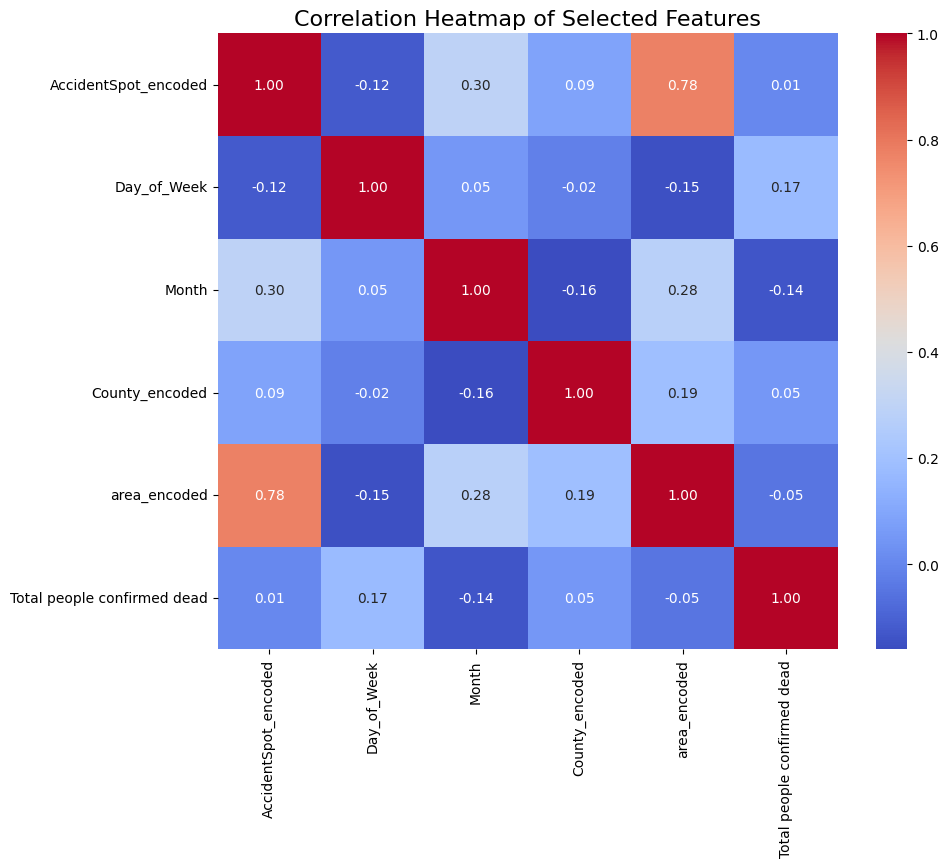

In [97]:

import seaborn as sns
import matplotlib.pyplot as plt# Example dataframe with your selected features

X = data[['AccidentSpot_encoded', 'Day_of_Week', 'Month', 
          'County_encoded', 'area_encoded', 'Total people confirmed dead']]

# Calculate the correlation matrix
correlation_matrix = X.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Add a title
plt.title("Correlation Heatmap of Selected Features", fontsize=16)

# Show the heatmap
plt.show()


In [104]:
# Selecting the features (X) and target variable (y)
X = data[['AccidentSpot_encoded', 'Day_of_Week', 'Month', 'County_encoded', 'area_encoded', 'Total people confirmed dead']]
y = data['High Risk Accident']

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [105]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy}")
print(f"Classification Report: \n{report}")


Accuracy: 0.9375
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.50      0.67         2

    accuracy                           0.94        16
   macro avg       0.97      0.75      0.82        16
weighted avg       0.94      0.94      0.93        16



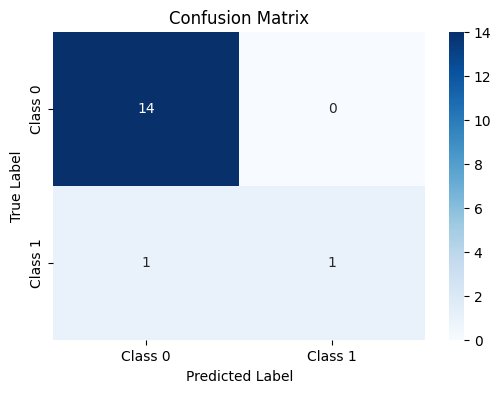

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

# Labeling the axes and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [107]:
# Display the distribution of classes in the training set
print("Training set distribution:")
print(y_train.value_counts())

# Display the distribution of classes in the test set
print("\nTest set distribution:")
print(y_test.value_counts())


Training set distribution:
High Risk Accident
0    55
1     7
Name: count, dtype: int64

Test set distribution:
High Risk Accident
0    14
1     2
Name: count, dtype: int64


In [108]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score, classification_report

# Initialize the RandomForestClassifier with class_weight='balanced' to handle class imbalance
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Print the accuracy of the model
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print the classification report, which includes precision, recall, f1-score, etc.
print(classification_report(y_test, y_pred))


Accuracy: 0.875
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       0.00      0.00      0.00         2

    accuracy                           0.88        16
   macro avg       0.44      0.50      0.47        16
weighted avg       0.77      0.88      0.82        16



d:\notes\ICS2405-Knowledge Based Systems\assignment\accident\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\notes\ICS2405-Knowledge Based Systems\assignment\accident\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\notes\ICS2405-Knowledge Based Systems\assignment\accident\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

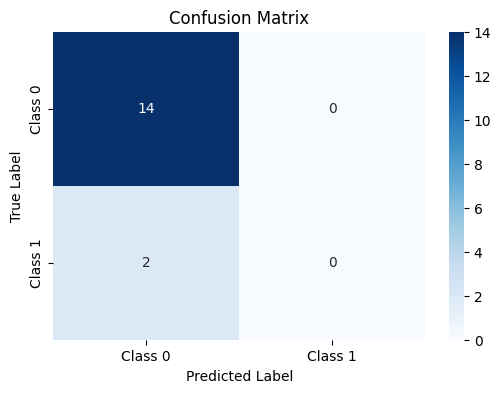

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

# Adding labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [111]:
print("Training set distribution:")
print(y_train.value_counts())

print("\nTest set distribution:")
print(y_test.value_counts())


Training set distribution:
High Risk Accident
0    55
1     7
Name: count, dtype: int64

Test set distribution:
High Risk Accident
0    14
1     2
Name: count, dtype: int64


In [112]:
import numpy as np

# Example input data
# Let's say the encoded values for 'AccidentSpot', 'County', and 'Area' are:
# AccidentSpot_encoded = 1 (for "Maai-Mahiu")
# County_encoded = 2 (for "Nakuru")
# Area_encoded = 3 (for "Naivasha")
# Day_of_Week = 1 (for Monday)
# Month = 1 (for January)
# Total number of deaths = 3

# Create the input for prediction (values in the correct order)
input_data = np.array([[1, 1, 1, 2, 3, 3]])  # Array with one row of input

# Use the model to make predictions
prediction = model.predict(input_data)

# Output the prediction result
print(f"Prediction: {prediction}")


Prediction: [0]


d:\notes\ICS2405-Knowledge Based Systems\assignment\accident\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [113]:

import joblib
# Save the trained model
joblib.dump(model, 'high risk_accident_model.pkl')

['high risk_accident_model.pkl']